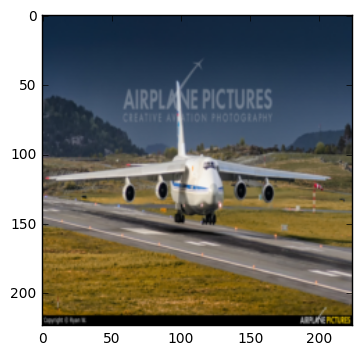

In [1]:
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize

%matplotlib inline

img1 = imread('aeroplane.jpg', mode='RGB')
img1 = imresize(img1, (224, 224))
plt.imshow (img1)
#prob = sess.run(vgg.probs, feed_dict={vgg.imgs: [img1]})[0]
#preds = (np.argsort(prob)[::-1])[0:5]
#for p in preds:
#    print class_names[p], prob[p]

In [2]:
from detector_custom import Detector

In [3]:
#weight_path = '../data/caffe_layers_value.pickle'
weight_path = '/home/gmd8si/Weakly_detector/vgg16CAM.npy'

In [4]:
n_labels = 1000
detector = Detector(weight_path, n_labels)

Weights are in the order of (64, 3, 3, 3) i.e. (filters, channels, width, height)... so just remember to take transpose while using tensorflow

In [5]:
#layer = detector.pretrained_weights['conv1_1']
#feature_map =  detector.visualize_filters(layer[0])
# Then remember to plot the results

In [6]:
from imagenet_classes import class_names
import tensorflow as tf
tf.reset_default_graph
images_tf = tf.placeholder( tf.float32, [None, 224, 224, 3], name="images")
labels_tf = tf.placeholder( tf.int64, [None], name='labels')


In [7]:
c1,c2,c3,c4,conv5, conv6, gap, output, prob = detector.inference( images_tf )
classmap = detector.get_classmap( labels_tf, conv6 )

('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(3), Dimension(64)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(224), Dimension(224), Dimension(64)]))
('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(64), Dimension(64)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(224), Dimension(224), Dimension(64)]))
('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(64), Dimension(128)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(112), Dimension(112), Dimension(128)]))
('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(128), Dimension(128)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(112), Dimension(112), Dimension(128)]))
('check conv_weights', TensorShape([Dimension(3), Dimension(3), Dimension(128), Dimension(256)]))
('before bias shape of conv', TensorShape([Dimension(None), Dimension(56), Dim

In [8]:
#im_content = tf.read_file('laska.png')
#image = tf.image.decode_jpeg(im_content, channels=3)
#image = tf.cast(image, tf.float32)
#train_image_batch = tf.train.batch(
#    [image], batch_size=1)
import numpy as np
img = np.expand_dims(img1, axis = 0)
#img = tf.cast(img, tf.float32) / 255.
#print (img.shape)
init_op = tf.initialize_all_variables()

In [9]:
with tf.Session() as sess:
    sess.run(init_op)
    conv6_val, output_val = sess.run([conv6, output], feed_dict={ images_tf: img})
    
    label_predictions = output_val.argmax( axis=1 )
    print ('label_preds', label_predictions)
    print class_names[label_predictions]
    
    classmap_vals = sess.run(classmap, feed_dict={ labels_tf: label_predictions, conv6: conv6_val})
    
    
classmap_vis = map(lambda x: ((x-x.min())/(x.max()-x.min())), classmap_vals)

    #for vis, ori in zip(classmap_vis, current_images):
    #    print l_name
plt.imshow( img1 )
plt.imshow( classmap_vis, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
plt.show()
    
    #acc = (label_predictions == current_labels).sum()

FailedPreconditionError: Attempting to use uninitialized value conv1_1/W
	 [[Node: conv1_1/W/read = Identity[T=DT_FLOAT, _class=["loc:@conv1_1/W"], _device="/job:localhost/replica:0/task:0/gpu:0"](conv1_1/W)]]
	 [[Node: CAM_conv/BiasAdd/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_34_CAM_conv/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'conv1_1/W/read', defined at:
  File "/opt/dl/anaconda/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/opt/dl/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/gmd8si/tf/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/gmd8si/tf/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/gmd8si/tf/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/gmd8si/tf/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/gmd8si/tf/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/gmd8si/tf/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-4b492ce19cd3>", line 1, in <module>
    c1,c2,c3,c4,conv5, conv6, gap, output, prob = detector.inference( images_tf )
  File "detector_custom.py", line 145, in inference
    relu1_1 = self.conv_layer( bgr, "conv1_1" )
  File "detector_custom.py", line 53, in conv_layer
    initializer=tf.constant_initializer(w)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 1022, in get_variable
    custom_getter=custom_getter)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 849, in get_variable
    custom_getter=custom_getter)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 345, in get_variable
    validate_shape=validate_shape)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 330, in _true_getter
    caching_device=caching_device, validate_shape=validate_shape)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 676, in _get_single_variable
    validate_shape=validate_shape)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 215, in __init__
    dtype=dtype)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 327, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1128, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/gmd8si/tf/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value conv1_1/W
	 [[Node: conv1_1/W/read = Identity[T=DT_FLOAT, _class=["loc:@conv1_1/W"], _device="/job:localhost/replica:0/task:0/gpu:0"](conv1_1/W)]]
	 [[Node: CAM_conv/BiasAdd/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_34_CAM_conv/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
    #classmap_answer = sess.run(classmap,feed_dict={labels_tf: current_labels,conv6: conv6_val})

    #classmap_vis = map(lambda x: ((x-x.min())/(x.max()-x.min())), classmap_vals)

    #for vis, ori,ori_path, l_name in zip(classmap_vis, current_images, current_image_paths, current_label_names):
    #    print l_name
    #    plt.imshow( ori )
    #    plt.imshow( vis, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
    #    plt.show()

In [9]:
with tf.Session() as sess:
    sess.run(init_op)
    #conv6_val, prob = sess.run([conv6, prob],feed_dict={images_tf: img })
    prob = sess.run(prob,feed_dict={images_tf: img })   # This returned value is always a numpy

In [11]:
print prob.shape
preds = (prob.argmax(axis = 1))[0:5]
#preds = (np.argsort(prob)[:,:,-1])[0:5]
print preds
#for p in preds:
print class_names[preds]

(1, 1000)
[404]
airliner


/home/gmd8si/tf/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [25]:
#print output_val
preds = tf.nn.softmax(output_val)
#preds = (np.argsort(prob))[0:5]
print prob

NameError: name 'output_val' is not defined

In [5]:
# This is for visualizing weight file
import numpy as np
keys = sorted(detector.pretrained_weights.keys())
for i, k in enumerate(keys):
    print i, k  #, detector.pretrained_weights[k]
#So the weights are alright and are referenced with the layer name IDs


0 conv1_1
1 conv1_2
2 conv2_1
3 conv2_2
4 conv3_1
5 conv3_2
6 conv3_3
7 conv4_1
8 conv4_2
9 conv4_3
10 conv5_1
11 conv5_2
12 conv5_3
13 drop6
14 drop7
15 fc6
16 fc7
17 fc8
18 pool1
19 pool2
20 pool3
21 pool4
22 pool5
23 prob
24 relu1_1
25 relu1_2
26 relu2_1
27 relu2_2
28 relu3_1
29 relu3_2
30 relu3_3
31 relu4_1
32 relu4_2
33 relu4_3
34 relu5_1
35 relu5_2
36 relu5_3
37 relu6
38 relu7
